## Trượt ván CartPole

> **Vấn đề**: Nếu Peter muốn thoát khỏi con sói, cậu ấy cần di chuyển nhanh hơn nó. Chúng ta sẽ xem cách Peter học trượt ván, đặc biệt là giữ thăng bằng, bằng cách sử dụng Q-Learning.

Đầu tiên, hãy cài đặt gym và nhập các thư viện cần thiết:


In [1]:
#code block 1

## Tạo môi trường cartpole


In [ ]:
#code block 2

Để xem môi trường hoạt động như thế nào, hãy chạy một mô phỏng ngắn trong 100 bước.


In [ ]:
#code block 3

Trong quá trình mô phỏng, chúng ta cần lấy các quan sát để quyết định cách hành động. Thực tế, hàm `step` trả về cho chúng ta các quan sát hiện tại, hàm phần thưởng, và cờ `done` cho biết liệu có nên tiếp tục mô phỏng hay không:


In [ ]:
#code block 4

In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Hãy cùng khám phá phương pháp rời rạc hóa khác sử dụng các thùng:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Hãy cùng chạy một mô phỏng ngắn và quan sát những giá trị môi trường rời rạc đó.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


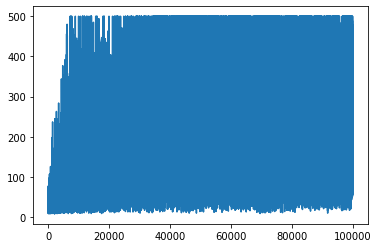

In [20]:
plt.plot(rewards)

Từ biểu đồ này, không thể xác định được điều gì, vì do tính chất của quá trình huấn luyện ngẫu nhiên, độ dài của các phiên huấn luyện thay đổi rất nhiều. Để hiểu rõ hơn về biểu đồ này, chúng ta có thể tính **trung bình động** qua một loạt các thí nghiệm, chẳng hạn 100. Điều này có thể được thực hiện một cách thuận tiện bằng cách sử dụng `np.convolve`:


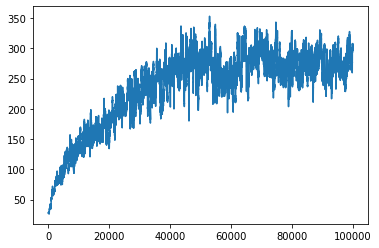

In [22]:
#code block 12

## Thay đổi siêu tham số và xem kết quả hoạt động

Bây giờ sẽ rất thú vị khi thực sự xem cách mô hình đã được huấn luyện hoạt động. Hãy chạy mô phỏng, và chúng ta sẽ sử dụng cùng chiến lược chọn hành động như trong quá trình huấn luyện: lấy mẫu dựa trên phân phối xác suất trong Q-Table:


In [23]:
# code block 13

## Lưu kết quả thành ảnh GIF động

Nếu bạn muốn gây ấn tượng với bạn bè, bạn có thể gửi cho họ ảnh GIF động của cây sào cân bằng. Để làm điều này, chúng ta có thể gọi `env.render` để tạo một khung hình ảnh, sau đó lưu những khung hình đó thành ảnh GIF động bằng thư viện PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Tuyên bố miễn trừ trách nhiệm**:  
Tài liệu này đã được dịch bằng dịch vụ dịch thuật AI [Co-op Translator](https://github.com/Azure/co-op-translator). Mặc dù chúng tôi cố gắng đảm bảo độ chính xác, xin lưu ý rằng các bản dịch tự động có thể chứa lỗi hoặc không chính xác. Tài liệu gốc bằng ngôn ngữ bản địa nên được coi là nguồn thông tin chính thức. Đối với các thông tin quan trọng, khuyến nghị sử dụng dịch vụ dịch thuật chuyên nghiệp bởi con người. Chúng tôi không chịu trách nhiệm cho bất kỳ sự hiểu lầm hoặc diễn giải sai nào phát sinh từ việc sử dụng bản dịch này.
